Example from VMLS Section 13.1.1

In [21]:
import numpy as np
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})
np.random.seed(100)  # To reproduce same random numbers

In [22]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)
    q = A.T.dot(b)
    L = llt(M)
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

In [23]:
def vandermonde(x, p):
    n = len(x)
    V = np.zeros((n, p)) 
    for i in range(n):
        for j in range(p):
            V[i, j] = x[i]**j
    return V

In [24]:
#Generate training data in the interval [-1,1]
N = 100
x = -1 + 2*np.random.random(N)
y = np.power(x, 3) - x + 0.4 / (1 + 25 * np.power(x, 2)) + \
    0.10 * np.random.randn(N)
x_test = -1 + 2*np.random.random(N)
y_test = np.power(x_test, 3) - x_test + 0.4 / (1 + 25 * np.power(x_test, 2)) + \
    0.10 * np.random.randn(N)

In [25]:
# Solve least squares problem for different polynomials
polyfit = lambda x, y, p: lstsq(vandermonde(x, p), y)[0]
poly_degree = [3, 7, 11, 16]
theta_res = {}
for p in poly_degree:
    theta_res[p] = polyfit(x, y, p)

In [26]:
# Evaluate polynomial
polyeval = lambda theta, x: vandermonde(x, len(theta)) @ theta

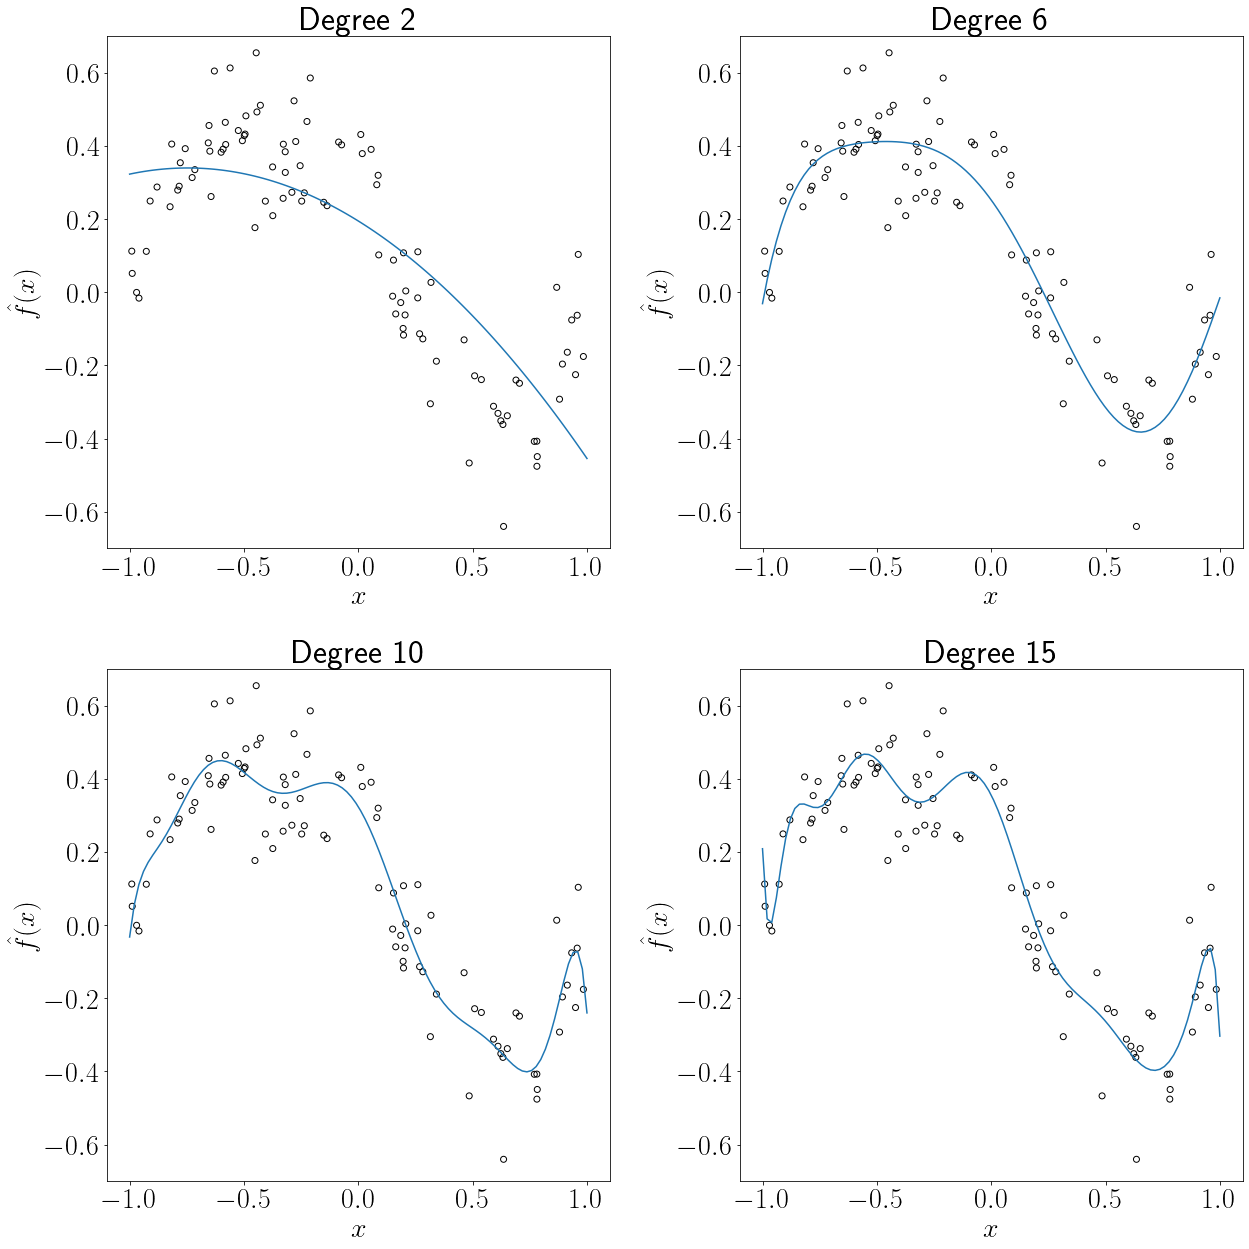

In [27]:
# Plot fit line
x_plot = np.linspace(-1, 1, 100)


fig, ax = plt.subplots(2,2, figsize=(18, 18))
axs = ax.ravel()

for idx in range(len(poly_degree)):
    p = poly_degree[idx]
    axs[idx].set_title(r'Degree %d' % (p-1))
    axs[idx].set_ylim(-0.7, 0.7)
    axs[idx].set_xlabel(r'$x$')
    axs[idx].set_ylabel(r'$\hat{f}(x)$')    
    axs[idx].scatter(x, y,  marker='o', color='k', facecolors='none')
    axs[idx].plot(x_plot, polyeval(theta_res[p], x_plot))
plt.tight_layout()
plt.savefig('1d_fit_poly.pdf')

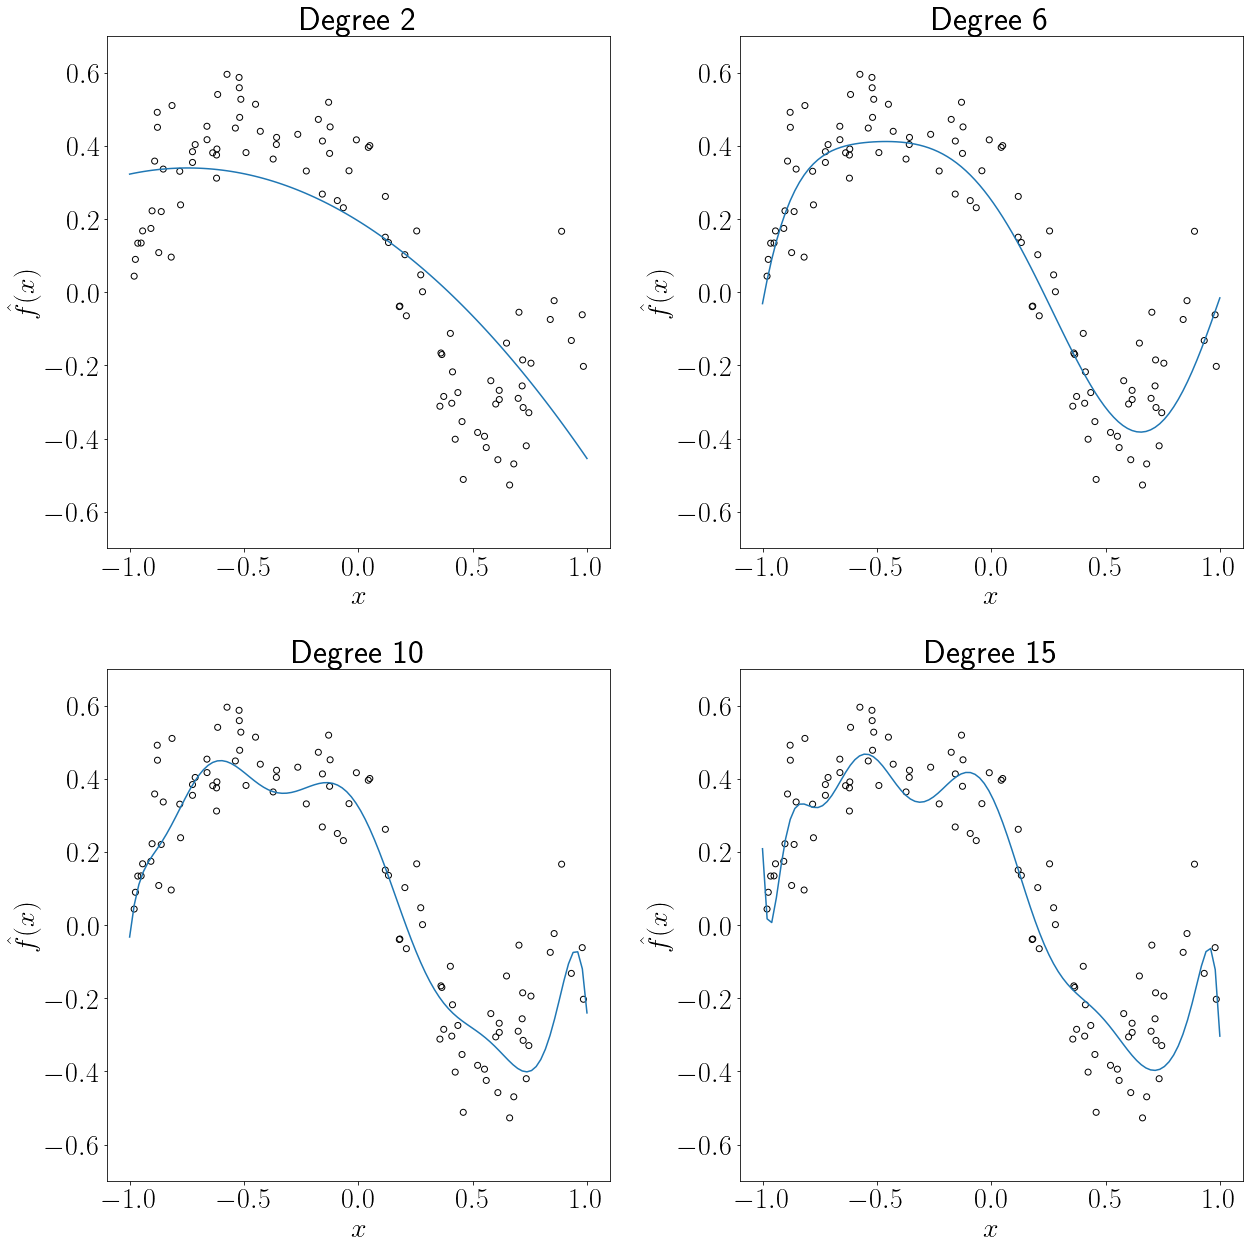

In [28]:
# Plot fit line
x_plot = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(2,2, figsize=(18, 18))
axs = ax.ravel()

for idx in range(len(poly_degree)):
    p = poly_degree[idx]
    axs[idx].set_title(r'Degree %d' % (p-1))
    axs[idx].set_ylim(-0.7, 0.7)
    axs[idx].set_xlabel(r'$x$')
    axs[idx].set_ylabel(r'$\hat{f}(x)$')    
    axs[idx].scatter(x_test, y_test,  marker='o', color='k', facecolors='none')
    axs[idx].plot(x_plot, polyeval(theta_res[p], x_plot))
plt.tight_layout()
plt.savefig('1d_fit_poly_test.pdf')

In [31]:
# Train polynomials with different orders
n_order = 21
error_train = np.zeros(n_order)
error_test = np.zeros(n_order)
for p in range(n_order):
    theta = polyfit(x, y, p+1)
    A = vandermonde(x, p+1)
    error_train[p] = np.linalg.norm(A @ theta - y)/np.linalg.norm(y)
    A = vandermonde(x_test, p+1)
    error_test[p] = np.linalg.norm(A @ theta - y_test)/np.linalg.norm(y_test)

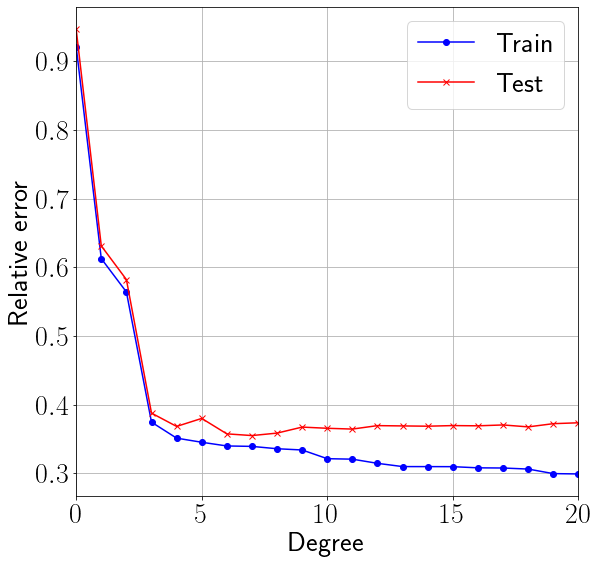

In [33]:
# Plot train vs test error
fig, ax = plt.subplots(figsize=(9, 9))
plt.plot(np.arange(n_order), error_train, 'b-o', label = 'Train') 
plt.plot(np.arange(n_order), error_test, 'r-x', label = 'Test') 
plt.xlabel('Degree')
plt.ylabel('Relative error')
plt.grid('on')
plt.xlim([0, 20])
plt.legend()
plt.savefig('1d_fit_poly_train_vs_test.pdf')